In [2]:
# https://www.kaggle.com/datasets/uom190346a/disease-symptoms-and-patient-profile-dataset
# pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/disease-symptoms-and-patient-profile-dataset")

print("Path to dataset files:", path)

C:\Users\otimi\anaconda3\envs\quadrant\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|█████████████████████████████████████████████████████████████████████████████████████| 3.07k/3.07k [00:00<?, ?B/s]

Extracting files...
Path to dataset files: C:\Users\otimi\.cache\kagglehub\datasets\uom190346a\disease-symptoms-and-patient-profile-dataset\versions\2


In [7]:
import pandas as pd

file = path + "\Disease_symptom_and_patient_profile_dataset.csv"
df = pd.read_csv(file)
print(df.head())

       Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19  Female   
1  Common Cold    No   Yes     Yes                   No   25  Female   
2       Eczema    No   Yes     Yes                   No   25  Female   
3       Asthma   Yes   Yes      No                  Yes   25    Male   
4       Asthma   Yes   Yes      No                  Yes   25    Male   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2         Normal            Normal         Negative  
3         Normal            Normal         Positive  
4         Normal            Normal         Positive  


In [9]:
import pandas as pd
from tabulate import tabulate

df = pd.read_csv(file)
print(tabulate(df.head(10), headers='keys', tablefmt='pretty'))

+---+-----------------+-------+-------+---------+----------------------+-----+--------+----------------+-------------------+------------------+
|   |     Disease     | Fever | Cough | Fatigue | Difficulty Breathing | Age | Gender | Blood Pressure | Cholesterol Level | Outcome Variable |
+---+-----------------+-------+-------+---------+----------------------+-----+--------+----------------+-------------------+------------------+
| 0 |    Influenza    |  Yes  |  No   |   Yes   |         Yes          | 19  | Female |      Low       |      Normal       |     Positive     |
| 1 |   Common Cold   |  No   |  Yes  |   Yes   |          No          | 25  | Female |     Normal     |      Normal       |     Negative     |
| 2 |     Eczema      |  No   |  Yes  |   Yes   |          No          | 25  | Female |     Normal     |      Normal       |     Negative     |
| 3 |     Asthma      |  Yes  |  Yes  |   No    |         Yes          | 25  |  Male  |     Normal     |      Normal       |     Positiv

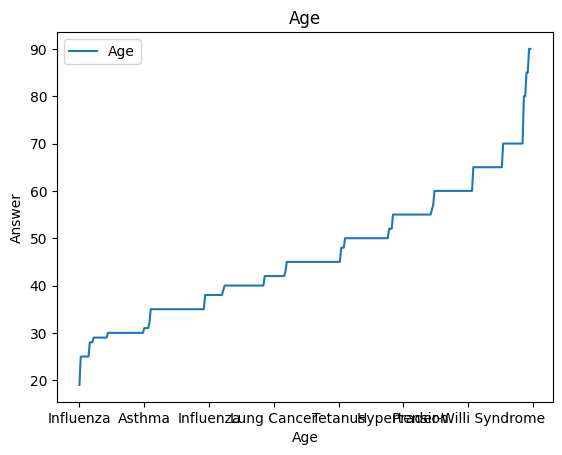

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(file)
df.plot(kind='line', x='Disease', y='Age')
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Answer")
plt.show()

In [14]:
import pandas as pd

df = pd.read_csv(file)
df.head(10).style.format(precision=2).set_caption("Exemplo de Tabela")

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [ ]:
# pip install pydot 
# pip install graphviz 
# pip install neo4j-runway

In [41]:
import numpy as np
import pandas as pd
from neo4j_runway import Discovery, GraphDataModeler, IngestionGenerator, llm, PyIngest
from IPython.display import display, Markdown, Image

In [24]:
import neo4j_runway
print(dir(neo4j_runway))

['DataModel', 'Discovery', 'GraphDataModeler', 'IngestionGenerator', 'PyIngest', 'UserInput', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'code_generation', 'discovery', 'exceptions', 'ingestion', 'inputs', 'llm', 'modeler', 'models', 'resources', 'utils', 'warnings']


In [47]:
from dotenv import load_dotenv
import os

# https://neo4j.com/product/auradb/?ref=docs-nav-get-started

load_dotenv(dotenv_path='.env')
OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')
NEO4J_URI = os.getenv('NEO4J_URI')
NEO4J_PASSWORD = os.getenv('NEO4J_API_KEY')

In [28]:
# https://www.kaggle.com/datasets/uom190346a/disease-symptoms-and-patient-profile-dataset
file = path + "\Disease_symptom_and_patient_profile_dataset.csv"
disease_df = pd.read_csv(file)
disease_df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [29]:
# Por exemplo, podemos criar uma lista de todas as doenças que causam dificuldade para respirar, 
# o que é muito interessante não apenas para selecionar nós no gráfico, mas também para desenvolver uma hipótese diagnóstica:
disease_df[disease_df['Difficulty Breathing']=='Yes']

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
314,Bronchitis,Yes,No,Yes,Yes,65,Male,High,High,Positive
315,Chronic Obstructive Pulmonary Disease (COPD),Yes,No,Yes,Yes,65,Female,High,High,Positive
316,Chronic Obstructive Pulmonary Disease (COPD),Yes,No,Yes,Yes,65,Female,High,High,Positive
330,Chronic Obstructive Pulmonary Disease (COPD),No,Yes,Yes,Yes,70,Male,Normal,High,Negative


In [30]:
disease_df.columns = disease_df.columns.str.strip()
for i in disease_df.columns:
    disease_df[i] = disease_df[i].astype(str)
disease_df.to_csv('disease_prepared.csv', index=False)

In [31]:
DATA_DESCRIPTION = {
'Disease': 'The name of the disease or medical condition.',
'Fever': 'Indicates whether the patient has a fever (Yes/No).',
'Cough': 'Indicates whether the patient has a cough (Yes/No).',
'Fatigue': 'Indicates whether the patient experiences fatigue (Yes/No).',
'Difficulty Breathing': 'Indicates whether the patient has difficulty breathing (Yes/No).',
'Age': 'The age of the patient in years.',
'Gender': 'The gender of the patient (Male/Female).',
'Blood Pressure': 'The blood pressure level of the patient (Normal/High).',
'Cholesterol Level': 'The cholesterol level of the patient (Normal/High).',
'Outcome Variable': 'The outcome variable indicating the result of the diagnosis or assessment for the specific disease (Positive/Negative).'
}

In [43]:
# O próximo passo é pedir ao LLM para analisar os dados tabulares, para identificar elementos dos dados que são importantes 
# para gerar um modelo de dados gráficos.
disc = Discovery(llm=llm, user_input=DATA_DESCRIPTION, data=disease_df)
#disc.run()

C:\Users\otimi\anaconda3\envs\quadrant\lib\site-packages\neo4j_runway\inputs\user_input.py:178: UserWarning:

user_input should include key:value pair {general_description: ...} for best results.



In [44]:
gdm = GraphDataModeler(llm=llm, discovery=disc)
gdm.create_initial_model()
gdm.current_model.visualize()

AssertionError: 

In [48]:
import warnings
import json
from langchain_community.graphs import Neo4jGraph

with warnings.catch_warnings():
    warnings.simplefilter('ignore')

NEO4J_USERNAME = "neo4j"
NEO4J_DATABASE = 'neo4j'

kg = Neo4jGraph(
    url=NEO4J_URI, username=NEO4J_USERNAME, password=NEO4J_PASSWORD, database=NEO4J_DATABASE
)

kg.refresh_schema()
print(textwrap.fill(kg.schema, 60))
schema=kg.schema

NameError: name 'textwrap' is not defined